In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

import pickle

In [100]:
df = pd.read_csv('data/sales_predictions_clean.csv')
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].round()
df['Units_Sold'] = (df['Item_Outlet_Sales'] / df['Item_MRP']).round()
df['Item_Visibility_Adjusted'] = df['Item_Visibility']*100
df['Item_Visibility'] = df['Item_Visibility'].round(5)
# df.head()
Outlets = df['Outlet_Identifier'].unique().tolist()
Item_Types = df['Item_Type'].unique().tolist()
Fat_Contents = df['Item_Fat_Content'].unique().tolist()

Model_Df = df
for i in range(len(Fat_Contents)):
    Model_Df.replace(Fat_Contents[i], value=i+1, inplace=True)
for i in range(len(Outlets)):
    Model_Df.replace(Outlets[i], value=i+1, inplace=True)
# for i in range(len(Item_Types)):
#     Model_Df.replace(Item_Types[i], value=i+1, inplace=True)
Model_Df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Units_Sold,Item_Visibility_Adjusted
0,FDA15,9.30,1,0.01605,Dairy,249.8092,1,1999,Medium,Tier 1,Supermarket Type1,3735.0,15.0,1.604730
1,DRC01,5.92,2,0.01928,Soft Drinks,48.2692,2,2009,Medium,Tier 3,Supermarket Type2,443.0,9.0,1.927822
2,FDN15,17.50,1,0.01676,Meat,141.6180,1,1999,Medium,Tier 1,Supermarket Type1,2097.0,15.0,1.676007
3,FDX07,19.20,2,0.00000,Fruits and Vegetables,182.0950,3,1998,Small,Tier 3,Grocery Store,732.0,4.0,0.000000
4,NCD19,8.93,1,0.00000,Household,53.8614,4,1987,High,Tier 3,Supermarket Type1,995.0,18.0,0.000000


In [122]:
lr_scores = {}
for i in range(len(Item_Types)):
    X = Model_Df[Model_Df['Item_Type']==Item_Types[i]].drop(columns=[
        'Item_Identifier',
        'Item_Type',
        # 'Item_Weight',
        # 'Item_Fat_Content',
        # 'Item_MRP',
        'Item_Visibility', ### THIS TANKS THE SCORE
        'Outlet_Identifier',
        'Outlet_Establishment_Year', 
        'Outlet_Size',
        'Outlet_Type',
        'Outlet_Location_Type',
        'Item_Outlet_Sales',
        'Units_Sold',
        'Item_Visibility_Adjusted'
        ])
    y = Model_Df[Model_Df['Item_Type']==Item_Types[i]]['Item_Outlet_Sales'].values
    # print(f'y = {y.shape}, X= {X.shape}')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 31)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    reg = LinearRegression(fit_intercept=True)
    reg.fit(X_train,y_train)
    reg.predict(X_test)

    score = reg.score(X_test, y_test)
    # print(score)
    lr_scores[Item_Types[i]] = score.round(4)

lr_scores

{'Dairy': 0.3313,
 'Soft Drinks': 0.3251,
 'Meat': 0.3839,
 'Fruits and Vegetables': 0.368,
 'Household': 0.276,
 'Baking Goods': 0.2735,
 'Snack Foods': 0.2634,
 'Frozen Foods': 0.3243,
 'Breakfast': 0.2989,
 'Health and Hygiene': 0.3549,
 'Hard Drinks': 0.4954,
 'Canned': 0.4234,
 'Breads': 0.357,
 'Starchy Foods': 0.3613,
 'Others': 0.2026,
 'Seafood': -0.0146}

In [124]:
knn_scores = {}
for i in range(len(Item_Types)):
    X = Model_Df[Model_Df['Item_Type']==Item_Types[i]].drop(columns=[
        'Item_Identifier',
        'Item_Type',
        # 'Item_Weight',
        # 'Item_Fat_Content',
        # 'Item_MRP',
        'Item_Visibility', ### THIS TANKS THE SCORE
        'Outlet_Identifier',
        'Outlet_Establishment_Year', 
        'Outlet_Size',
        'Outlet_Type',
        'Outlet_Location_Type',
        'Item_Outlet_Sales',
        'Units_Sold',
        'Item_Visibility_Adjusted'
        ])
    y = Model_Df[Model_Df['Item_Type']==Item_Types[i]]['Item_Outlet_Sales'].values
    # print(f'y = {y.shape}, X= {X.shape}')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 31)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors= 2)
    # print(knn)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_train)
    predictions
    score = knn.score(X_test, y_test)
    knn_scores[Item_Types[i]] = score.round(4)

knn_scores

{'Dairy': 0.0292,
 'Soft Drinks': 0.0536,
 'Meat': 0.0187,
 'Fruits and Vegetables': 0.0227,
 'Household': 0.0351,
 'Baking Goods': 0.0309,
 'Snack Foods': 0.0133,
 'Frozen Foods': 0.014,
 'Breakfast': 0.0,
 'Health and Hygiene': 0.0308,
 'Hard Drinks': 0.0,
 'Canned': 0.0307,
 'Breads': 0.0317,
 'Starchy Foods': 0.027,
 'Others': 0.0,
 'Seafood': 0.0625}

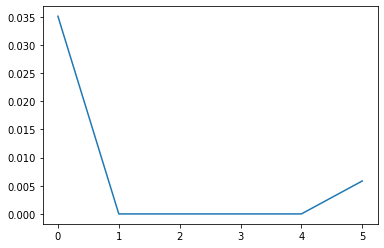

In [110]:
score = {}
# range(1, (len(X_train)//10))
for i in range(1, len(X_train), 100):
    # print(i)
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_train)
    test_predictions = knn.predict(X_test)
    score[i] = knn.score(X_test, y_test)

plt.plot(score.values());

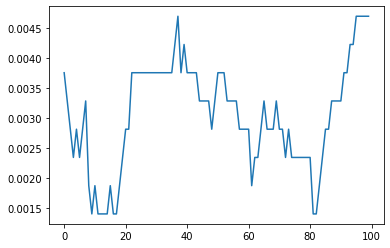

In [62]:
score = {}
# range(1, (len(X_train)//10))
for i in range(1, 1000, 10):
    # print(i)
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_train)
    test_predictions = knn.predict(X_test)
    score[i] = knn.score(X_test, y_test)

plt.plot(score.values());

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 31)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)
reg.predict(X_test)

score = reg.score(X_test, y_test)
print(score)

0.331303153521491
